In [33]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import json
import gff3_parsing2
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob

In [20]:
test_df, test_genome = gff3_parsing2.compile_sequences(["../Data/host_genomes/562.gff3"],\
                                                       ["../Data/host_genomes/562.fasta"])

In [24]:
3399+2328

5727

In [29]:
test_df.iloc[3390:3410]

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence
3390,NC_006350.1,RefSeq,CDS,4065400,4065951,.,-,0,ID=cds-YP_110016.1;Parent=gene-BPSL3423;Dbxref...,TTGTGTATGGATAAATGCGATAATTGCGCATCAAAACGCATAATCA...,AAATGGGCGA
3391,NC_006350.1,RefSeq,CDS,4066035,4066928,.,+,0,ID=cds-YP_110017.1;Parent=gene-BPSL3424;Dbxref...,ATGTCCACGGTCGTTACCGCGAAACTGAAGGAACAGTTCGACGCGG...,GGGCTACCCC
3392,NC_006350.1,RefSeq,CDS,4067012,4067317,.,+,0,ID=cds-YP_110018.1;Parent=gene-BPSL3425;Dbxref...,ATGATTCACAAGCTCACATCGGAAGAACGCAAGACGCAGCTTGAAA...,AGGGACGAAA
3393,NC_006350.1,RefSeq,CDS,4067752,4068444,.,+,0,ID=cds-YP_110019.1;Parent=gene-BPSL3426;Dbxref...,ATGCGACTCCTTCTGATCGAAGACGACCGCCCCATCGCACGCGGCA...,AGCGAATCTC
3394,NC_006350.1,RefSeq,CDS,4068551,4070035,.,+,0,ID=cds-YP_110020.1;Parent=gene-BPSL3427;Dbxref...,ATGTCCCCTGATCCGGCTGTGACCAGCCTGCGCCGCACGCTGCTGC...,CTTTCGCGCG
3395,NC_006350.1,RefSeq,CDS,4070477,4070989,.,-,0,ID=cds-YP_110021.1;Parent=gene-BPSL3428;Dbxref...,ATGAGTTCACGCAGGATCGTGGTACGCCGCTCGGGCGTTCACGGCA...,GATTCGTTCG
3396,NC_006350.1,RefSeq,CDS,4071299,4072411,.,-,0,ID=cds-YP_110022.1;Parent=gene-BPSL3429;Dbxref...,ATGAGTGCATTGTTTTCTCCATTCACGCTGCGCGGCGTGACCCTTC...,GGCGGCTGCC
3397,NC_006350.1,RefSeq,CDS,4072638,4073348,.,-,0,ID=cds-YP_110023.1;Parent=gene-BPSL3430;Dbxref...,ATGAACGCTGAAGTCGTTGCGATTCGCCACGTGCATTTCGAGGATC...,GGAGGCGCCG
3398,NC_006350.1,RefSeq,CDS,4073388,4074029,.,-,0,ID=cds-YP_110024.1;Parent=gene-BPSL3431;Dbxref...,ATGAGCGATGGTGTTTACGGGAACCAGGCTGCGGGGCGAGTGACCC...,CGAAAAGACT
3399,NC_006351.1,RefSeq,CDS,1,1188,.,+,0,ID=cds-YP_110025.1;Parent=gene-BPSS0001;Dbxref...,ATGACTCTCGACGAGATCCGGCAATCCATCCGTGAAGAACTCGATG...,


In [26]:
test_df.head()

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence
2,NC_006350.1,RefSeq,CDS,1,1116,.,-,0,ID=cds-YP_106626.1;Parent=gene-BPSL0001;Dbxref...,ATGGCACTCGAAACCTTCGTCAATTCCGAACCGTTCACGTTCGGCG...,GAATCACGCC
4,NC_006350.1,RefSeq,CDS,1161,2375,.,-,0,ID=cds-YP_106627.1;Parent=gene-BPSL0002;Dbxref...,ATGAAGTCAGCGTTCTCGTTTCTACCCAACTGGCCGCTCGCCCCGG...,AGTCACCACG
18,NC_006350.1,RefSeq,CDS,3114,5096,.,-,0,ID=cds-YP_106628.2;Parent=gene-BPSL0003;Dbxref...,ATGACCGATCGAATCGTTCCGGCGACGCTCGTCTTCCGCGAGGACG...,TTTGTTTCGC
21,NC_006350.1,RefSeq,CDS,5488,5766,.,+,0,ID=cds-YP_106629.1;Parent=gene-BPSL0004;Dbxref...,ATGAACAAACAGGAACTGATCGACGCCGTCGCCGCCCAGACGGGCG...,AGGAACCTTA
25,NC_006350.1,RefSeq,CDS,5869,7209,.,-,0,ID=cds-YP_106630.1;Parent=gene-BPSL0005;Dbxref...,ATGAACCAGCCGTTGCCCGTCACCGTGCTGTCCGGCTTCCTCGGCG...,GCGCACCGCA


In [28]:
test_df, test_genome = gff3_parsing2.compile_sequences(["../Data/host_genomes/28450.1.gff3","../Data/host_genomes/28450.2.gff3"],\
                                                       ["../Data/host_genomes/28450.1.fasta", "../Data/host_genomes/28450.2.fasta"])


In [7]:
test_df, test_genome = gff3_parsing2.compile_sequences(["../Data/host_genomes/28450.1.gff3","../Data/host_genomes/28450.2.gff3"],\
                                                       ["../Data/host_genomes/28450.1.fasta", "../Data/host_genomes/28450.2.fasta"])

In [36]:
def analyze_genome(dataframe, energy_dict, gaps = (4,10), expected_len = 20):
    
    for index in dataframe.index:
        upstream = dataframe.loc[index,"upstream_sequence"]
        test_string = upstream.replace("T", "U")
        if len(test_string) != expected_len:
            continue
        if test_string.count("A") + test_string.count("U") +\
                                    test_string.count("C") + test_string.count("G") != expected_len:
            continue
            
        energy_list = []
        for gap in range(gaps[0],gaps[1]+1):
             energy_list.append(energy_dict[test_string[-gap - 6: -gap]])

        dataframe.at[index, "energy_binding"] = min(energy_list)
    return dataframe

In [58]:
with open('../Data/energy_files/energyRef_CCUCCU_ensemble_noneConstraint.json', 'r') as infile:
       energy_dict = json.load(infile)

host_id = 717959

host_df, host_genome = gff3_parsing.compile_sequences(["../Data/host_genomes/{}.gff3".format(host_id)],
                                                    ["../Data/host_genomes/{}.fasta".format(host_id)], 20)
#combined_id = 28450
host_df = analyze_genome(host_df, energy_dict)
host_df.to_csv("../Data/host_genomes/{}.tsv".format(host_id), sep = "")

In [ ]:
viral_means = []

p_values = []
host_id = 657318

for gff_file in glob.glob("../Data/{}_rep_viruses/*.gff".format(host_id)):
    
   
    fasta_file = gff_file.replace("gff", "fasta")
    tsv_file = gff_file.replace("gff", "tsv")

    viral_df, viral_genome = gff3_parsing.compile_sequences([gff_file],[fasta_file], 20)
    
#     if viral_df.shape[0] < 50:
#         print("ignoring one")
#         continue
    viral_df = analyze_genome(viral_df, energy_dict)
    viral_df.to_csv(tsv_file, sep = "\t")

#     #print(stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"]))
#     rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
#     p_values.append(p_value)
    
#     viral_means.append(np.mean(viral_df["energy_binding"]))
    

In [16]:
# print(len(mean_difs))
# print(len(p_values))
# print(mean_difs)
# print(p_values)

# combined_dict = {"p_values":p_values, "mean_difs":mean_difs}



# combined_df = pd.DataFrame(combined_dict)
# combined_df.head()

# combined_df.to_csv("stats_df.tsv", sep = ",")

# To-Do: 

1. How many/what percent/proportion of p-values are < 0.01
2. distribution of p-values, mean_difs
3. Count the negatives (put as fraction /373)
4. How many cases where host is stronger, is the p_value still significant?
5. Scatterplot of p_values, mean_difs


In [62]:
#1
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues))

4


In [63]:
len(p_values)

37

In [31]:
#proportion of significant p-values
len(significant_pvalues)/len(p_values)

0.6049382716049383

In [50]:
zippy = zip(mean_difs, p_values)
len([i for i in zippy if i[1] < 0.01 and i[0]>0])

4

In [33]:
# list(zippy)

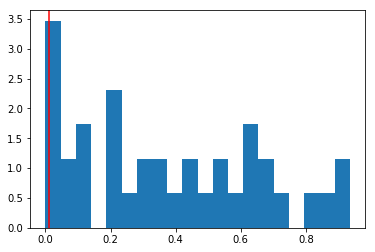

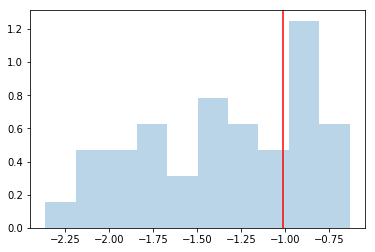

In [64]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(viral_means, density= True, alpha = 0.3)
ax2.axvline(host_mean, color = "r")

In [24]:
#3

negative_values = []
for neg in mean_difs:
    if neg < 0:
        negative_values.append(neg)
        
len(negative_values)

344

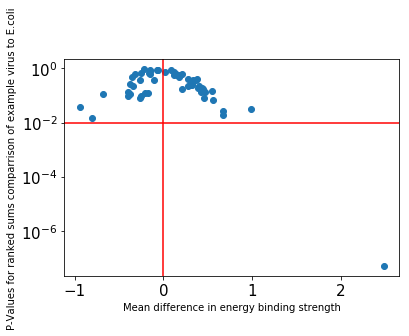

In [39]:
fig, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums comparrison of example virus to E.coli")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(mean_difs,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")
#ax.set_ylim(10e-12, 10)

#hides 2 data points 

In [13]:
!jt -r

Reset css and font defaults in:
/Users/ChaseWeaver/.jupyter/custom &
/Users/ChaseWeaver/Library/Jupyter/nbextensions
